## Diabetes Prediction Dataset

Dataset Source: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

#### Install Necessary Libraries

In [1]:
%pip install -U matplotlib
%pip install -U numpy
%pip install auto-sklearn seaborn sklearn imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Import Necessary Libraries

In [2]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import autosklearn
from autosklearn.classification import AutoSklearnClassifier

#### Show Library Versions

In [3]:
n = 18

print(f"Language/Library".rjust(n-2), '|', 'Version')
print('-' * (n-2), '|', '--------')
print("Python :".rjust(n), sys.version[0:6])
print("NumPy :".rjust(n), np.__version__)
print("Pandas :".rjust(n), pd.__version__)
print("Sklearn :".rjust(n), sklearn.__version__)
print("Auto-Sklearn :".rjust(n), autosklearn.__version__)
print("Seaborn :".rjust(n), sns.__version__)

Language/Library | Version
---------------- | --------
          Python : 3.10.1
           NumPy : 1.25.0
          Pandas : 1.5.3
         Sklearn : 0.24.2
    Auto-Sklearn : 0.15.0
         Seaborn : 0.12.2


### Initial Data Preprocessing

#### Mount Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Ingest Dataset

In [6]:
col_names = ["gender",
             "age",
             "hypertension",
             "heart_disease",
             "smoking_history",
             "bmi",
             "HbA1c_level",
             "blood_glucose_level",
             "target"
             ]

data_types = {"gender": 'category',
              "age": np.float16,
              "hypertension": np.uint8,
              "heart_disease": np.uint8,
              "smoking_history": 'category',
              "bmi": np.float32,
              "HbA1c_level": np.float32,
              "blood_glucose_level": np.uint16,
              "target": np.uint8
              }

data = pd.read_csv("/content/drive/MyDrive/Diabetes Prediction/diabetes_prediction_dataset.csv",
                   names=col_names,
                   dtype=data_types,
                   engine='c',
                   header=0)

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,target
0,Female,80.0,0,1,never,25.190001,6.6,140,0
1,Female,54.0,0,0,No Info,27.320000,6.6,80,0
2,Male,28.0,0,0,never,27.320000,5.7,158,0
3,Female,36.0,0,0,current,23.450001,5.0,155,0
4,Male,76.0,1,1,current,20.139999,4.8,155,0


#### More Dataset Information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  category
 1   age                  100000 non-null  float16 
 2   hypertension         100000 non-null  uint8   
 3   heart_disease        100000 non-null  uint8   
 4   smoking_history      100000 non-null  category
 5   bmi                  100000 non-null  float32 
 6   HbA1c_level          100000 non-null  float32 
 7   blood_glucose_level  100000 non-null  uint16  
 8   target               100000 non-null  uint8   
dtypes: category(2), float16(1), float32(2), uint16(1), uint8(3)
memory usage: 1.6 MB


### Visualizations

#### Create Function to Visualize Features (Barplot)

In [8]:
def barplot_visual(feature_to_visualize: pd.Series,
                   plot_title: str,
                   x_label: str,
                   y_label: str = "# of Samples",
                   ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - y_label: The string label value for the y label.

    Output:
    - A Bar Plot.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."

    ax = feature_to_visualize.value_counts().plot.bar(
                                                      figsize=(12,8),
                                                      rot=0,
                                                      legend=False,
                                                      color=["lightgreen",
                                                             "blue",
                                                             "brown",
                                                             "lightblue",
                                                             "tan",
                                                             "yellow",
                                                             "orange",
                                                             "green",
                                                             "red",
                                                             "purple"]
                                                      )

    ax.bar_label(ax.containers[0])

    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()

#### Dataset Visualization: Gender

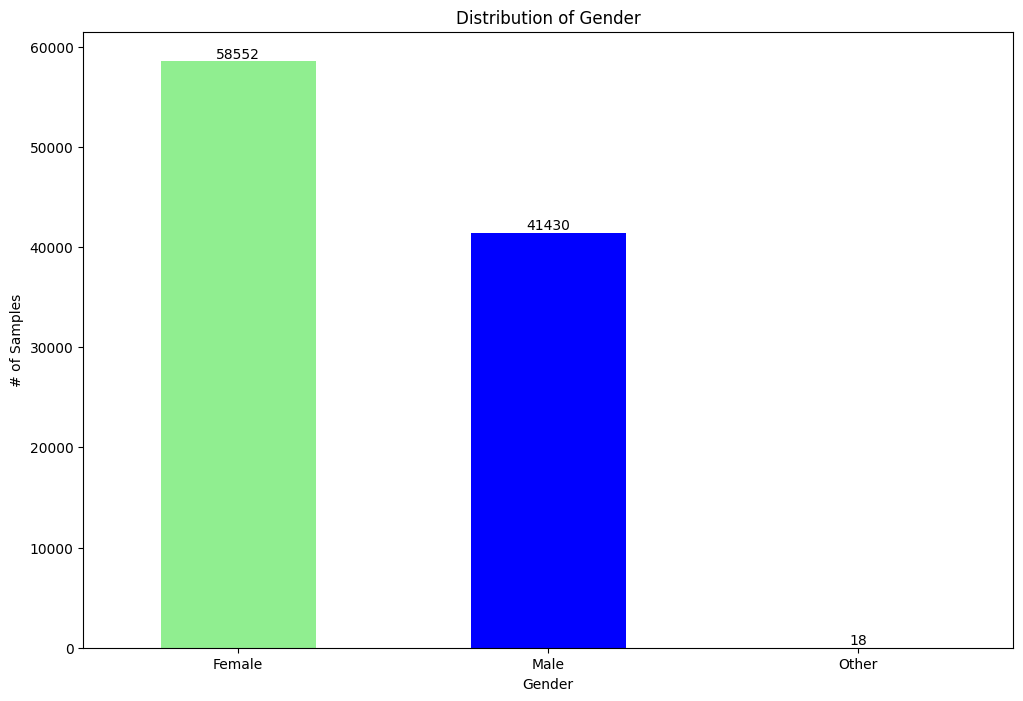

In [9]:
barplot_visual(data["gender"],
               "Distribution of Gender",
               "Gender",
               "# of Samples",
               )

#### Dataset Visualization: Hypertension

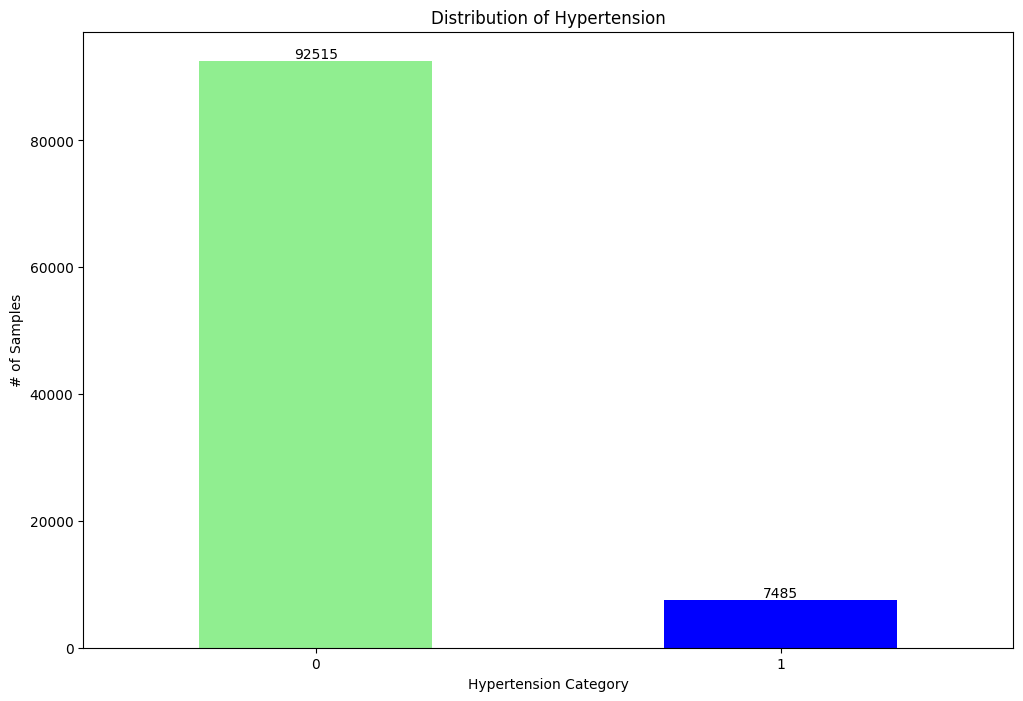

In [10]:
barplot_visual(data["hypertension"],
               "Distribution of Hypertension",
               "Hypertension Category",
               "# of Samples",
               )

#### Dataset Visualization: Heart Disease

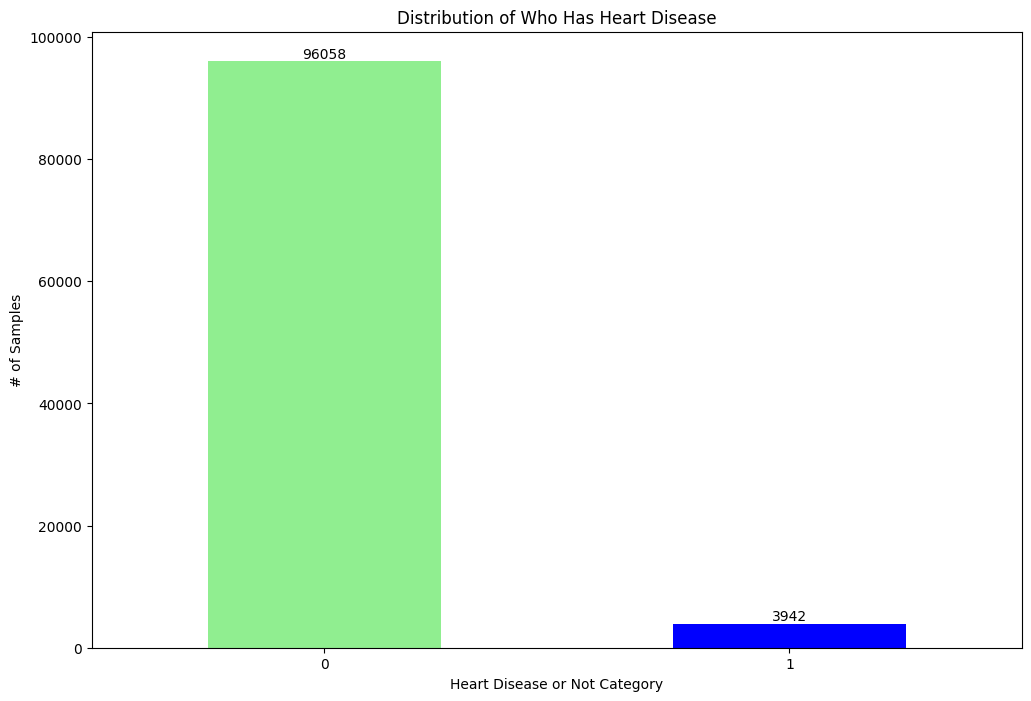

In [11]:
barplot_visual(data["heart_disease"],
               "Distribution of Who Has Heart Disease",
               "Heart Disease or Not Category",
               "# of Samples",
               )

#### Dataset Visualization: Smoking History

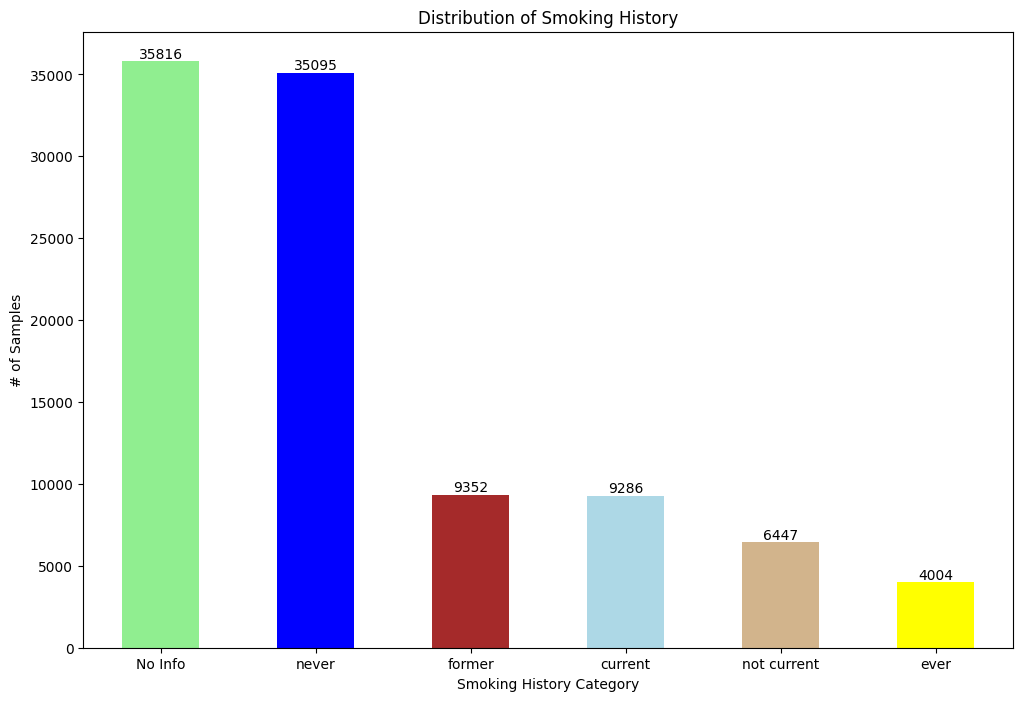

In [12]:
barplot_visual(data["smoking_history"],
               "Distribution of Smoking History",
               "Smoking History Category",
               "# of Samples",
               )

#### Dataset Visualization: Target Distribution (Diabetes)

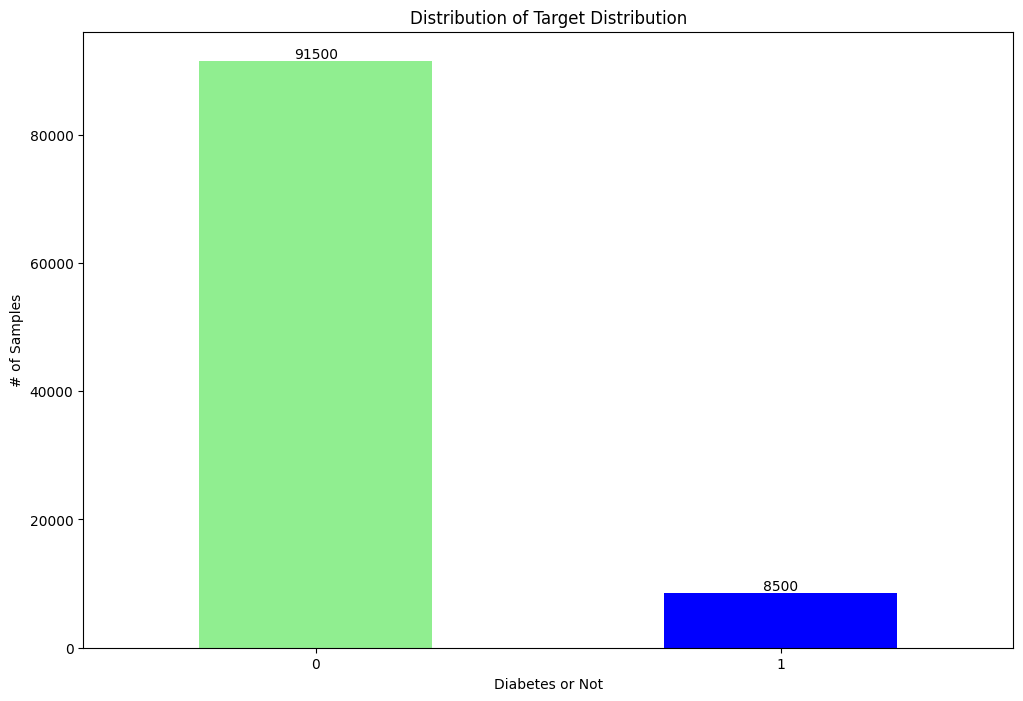

In [13]:
barplot_visual(data["target"],
               "Distribution of Target Distribution",
               "Diabetes or Not",
               "# of Samples",
               )

#### Create Function to Visualize Features (Histograms)

In [14]:
def histogram_visual(feature_to_visualize: pd.Series,
                     num_of_bins: int,
                     plot_title: str,
                     x_label: str,
                     x_start: float = -1.0,
                     y_label: str = "# of Samples",
                     min_value: float = 0,
                     max_value: float or int = 1
                     ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - x_start: To force the x-axis of the visual to start at
    a specified value instead of the automatically generated
    value, assign the float value here. Otherwise, the
    autogenerated start value will be used.
    - y_label: The string label value for the y label.
    - min_value: The minimum value in the Series for the purposes
        of creating a vertical line in the graphic.
    - max_value: The maximum value in the Series for the purposes
        of creating a vertical line in the graphic.

    Output:
    - A histogram.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."
    assert type(x_start) != 'float', \
        "The x_start value must be a float value."
    assert type(min_value) != 'float' or type(min_value) != 'int', \
        "The min_value value must be either a float or an integer value."
    assert  type(max_value) != 'float' or type(max_value) != 'int', \
        "The max_value value must be either a float or an integer value."

    ax = feature_to_visualize.hist(grid=False,
                                   bins=num_of_bins,
                                   figsize=(18, 8))
    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.axvline(x = min_value,
                color = 'r',
                linewidth = "5",
                linestyle= 'dashed',
                label = 'axvline - full height')

    plt.axvline(x = max_value,
                color = 'r',
                linewidth = "5",
                linestyle= 'dashed',
                label = 'axvline - full height')

    if x_start != -1:
        plt.xlim([0, (max(feature_to_visualize) + (1/num_of_bins))])

    plt.show()

#### Dataset Visualization: Age

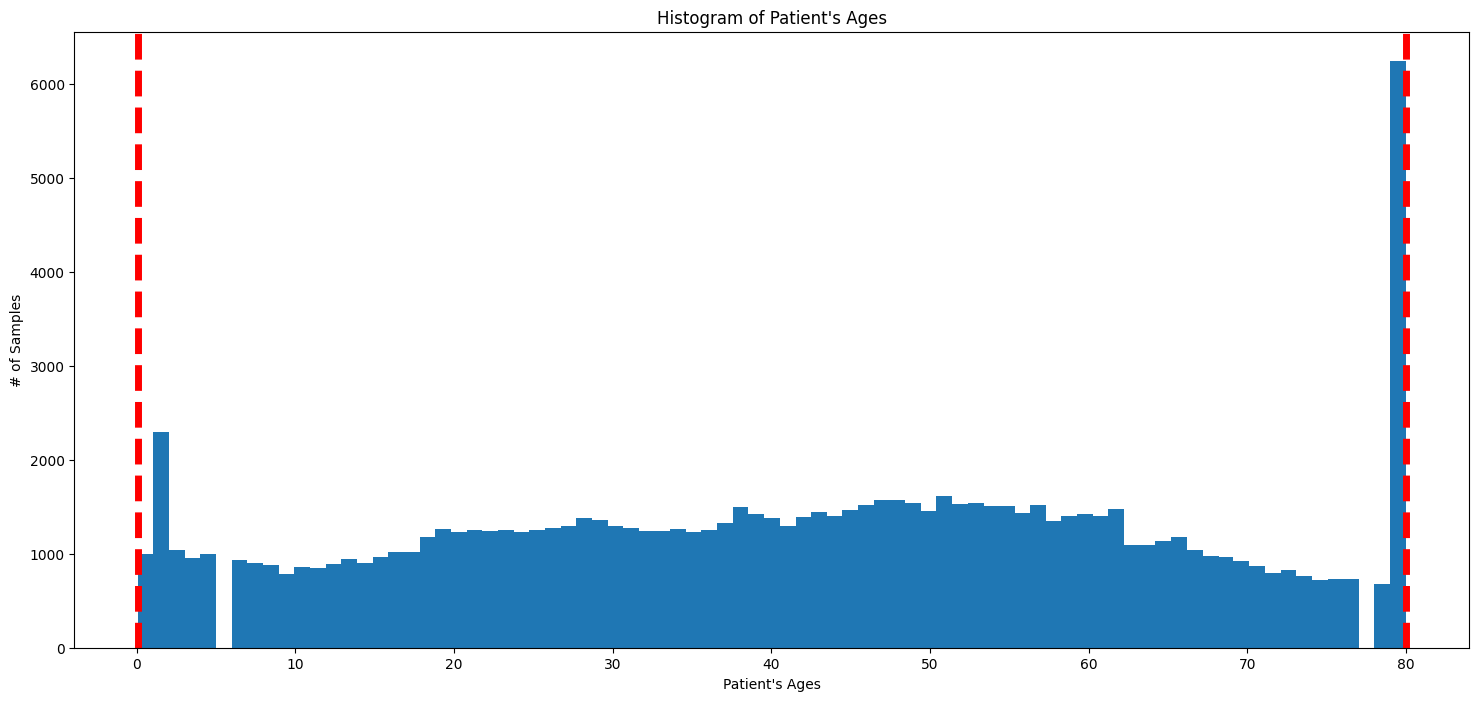

Ages range from 0.08001708984375 to 80.0 years old.


In [15]:
histogram_visual(data['age'],
                 num_of_bins=81,
                 plot_title="Histogram of Patient's Ages",
                 x_label="Patient's Ages",
                 min_value=min(data['age']),
                 max_value=max(data['age']))

print(f"Ages range from " +
      f"{min(data['age'])} to " +
      f"{max(data['age'])} years old.")

#### Dataset Visualization: Body Mass Index

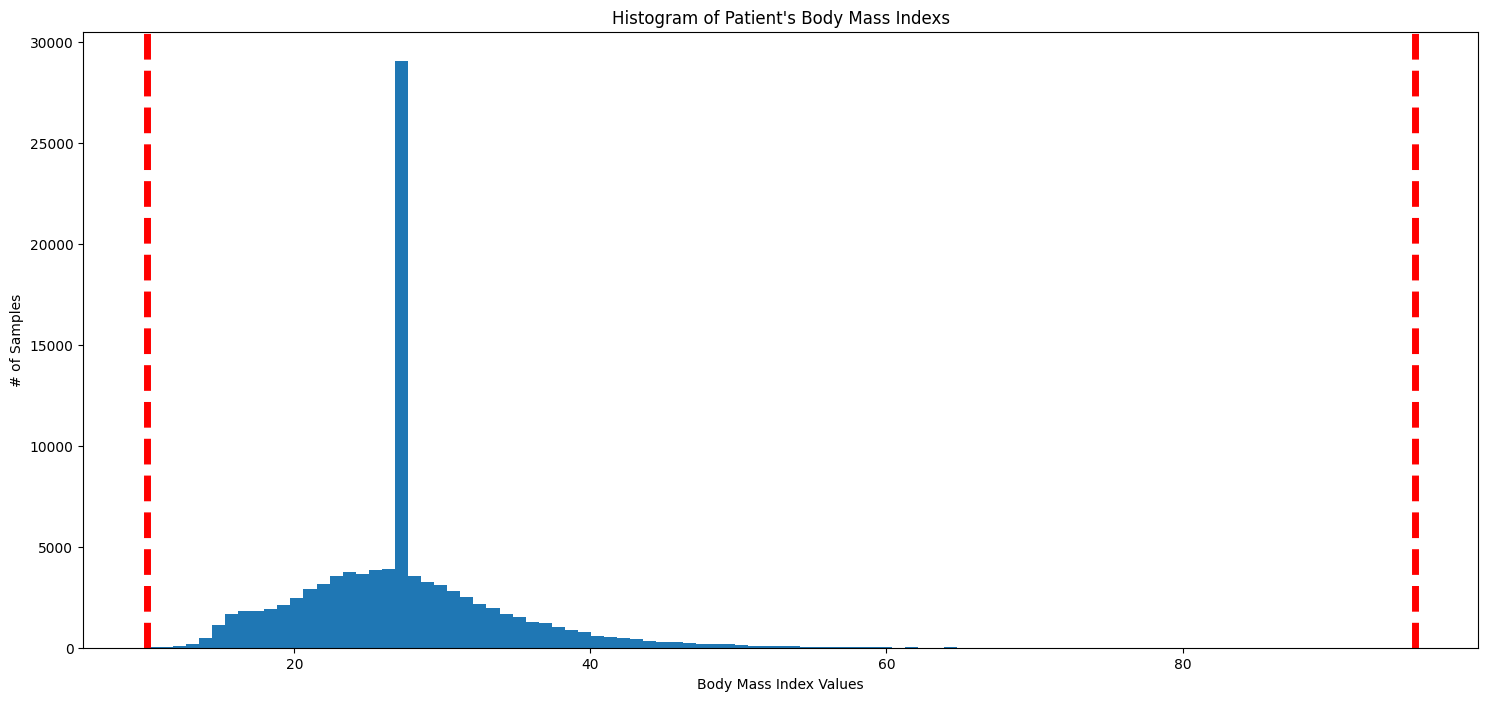

Body Mass Indexs range from 10.010000228881836 to 95.69000244140625.


In [16]:
histogram_visual(data['bmi'],
                 num_of_bins=97,
                 plot_title="Histogram of Patient's Body Mass Indexs",
                 x_label="Body Mass Index Values",
                 min_value=min(data['bmi']),
                 max_value=max(data['bmi']))

print(f"Body Mass Indexs range from" +
      f" {min(data['bmi'])} to" +
      f" {max(data['bmi'])}.")

#### Dataset Visualization: HbA1c Level

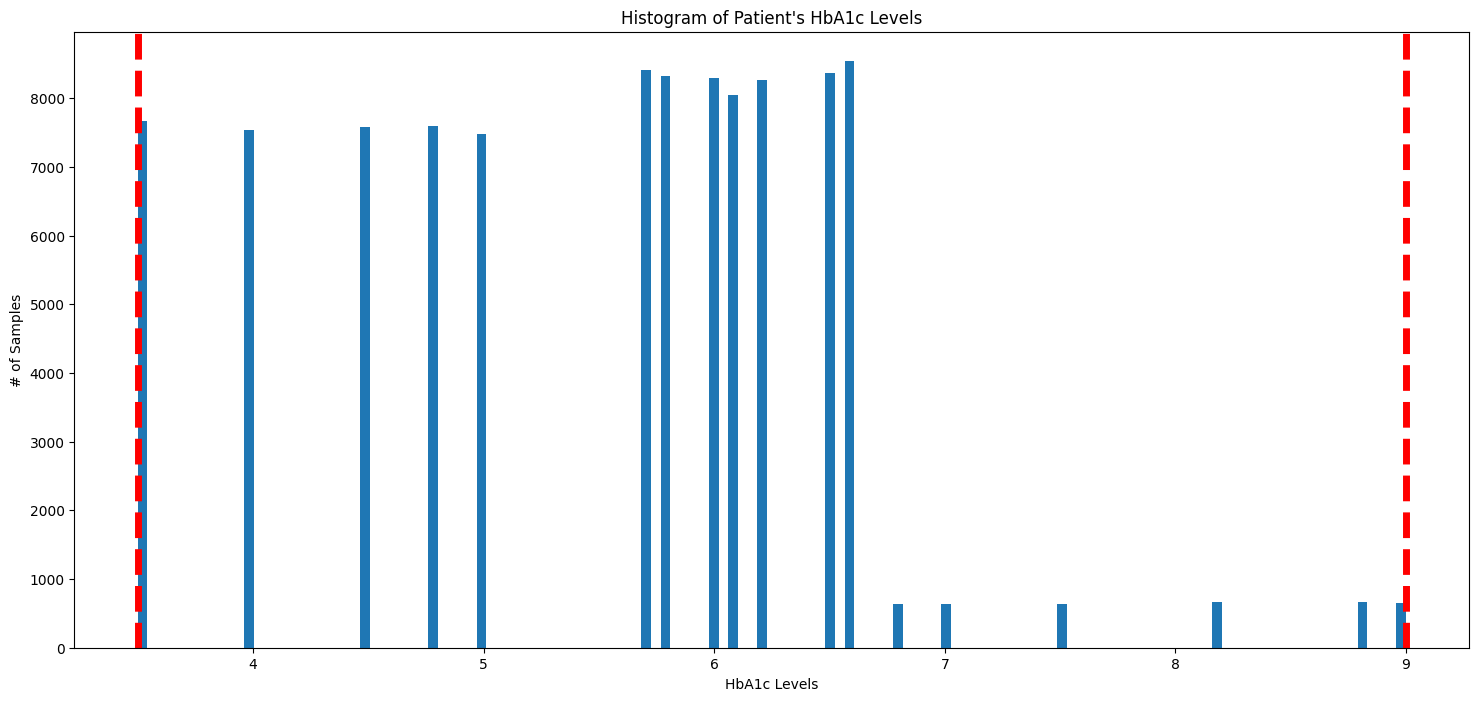

HbA1c levels in this dataset range from 3.5 to 9.0.


In [17]:
histogram_visual(data['HbA1c_level'],
                 num_of_bins=131,
                 plot_title="Histogram of Patient's HbA1c Levels",
                 x_label="HbA1c Levels",
                 min_value=min(data['HbA1c_level']),
                 max_value=max(data['HbA1c_level']))

print(f"HbA1c levels in this dataset range from" +
      f" {min(data['HbA1c_level'])} to" +
      f" {max(data['HbA1c_level'])}.")

#### Dataset Visualization: Blood Glucose Level

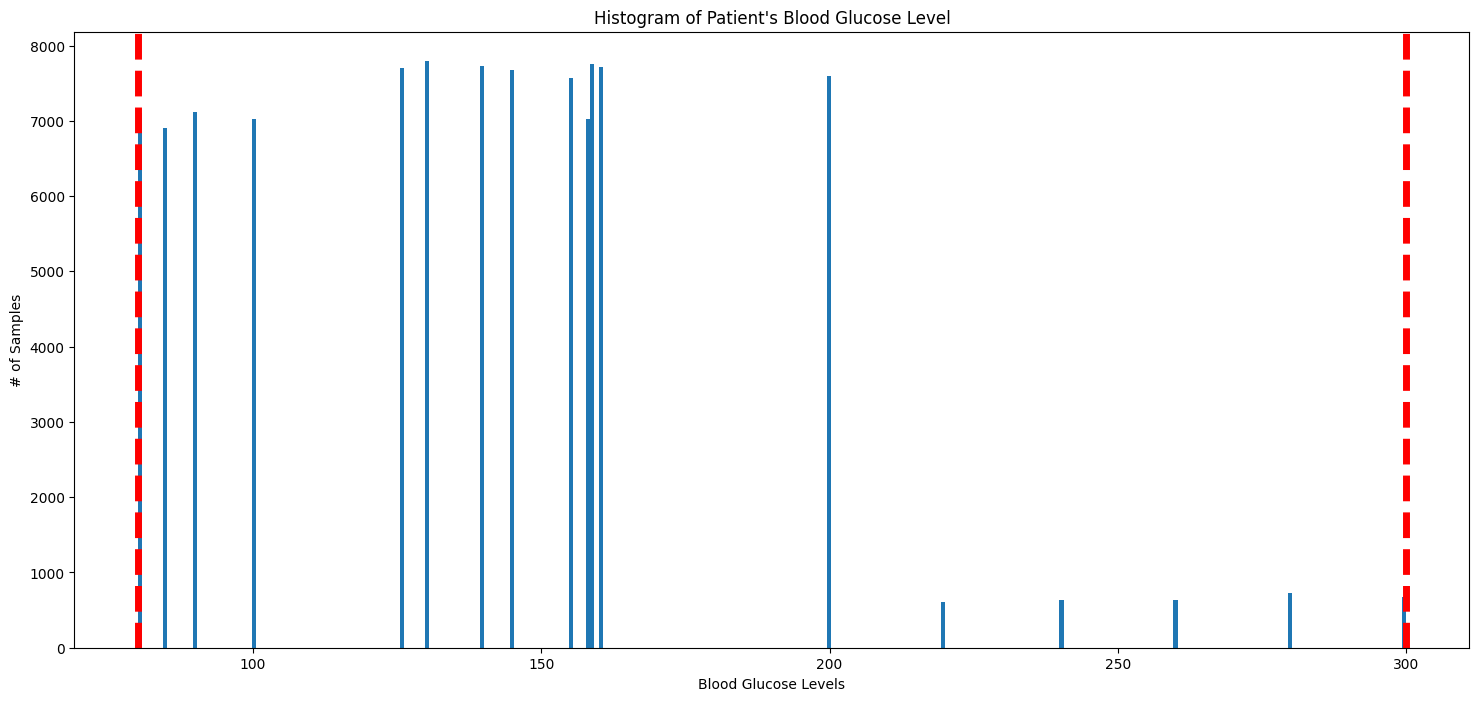

Blood Glucose Level range from 80 to 300.


In [18]:
histogram_visual(data['blood_glucose_level'],
                 num_of_bins=300,
                 plot_title="Histogram of Patient's Blood Glucose Level",
                 x_label="Blood Glucose Levels",
                 min_value=min(data['blood_glucose_level']),
                 max_value=max(data['blood_glucose_level']))

print(f"Blood Glucose Level range from" +
      f" {min(data['blood_glucose_level'])} to" +
      f" {max(data['blood_glucose_level'])}.")

#### Correlation Matrix

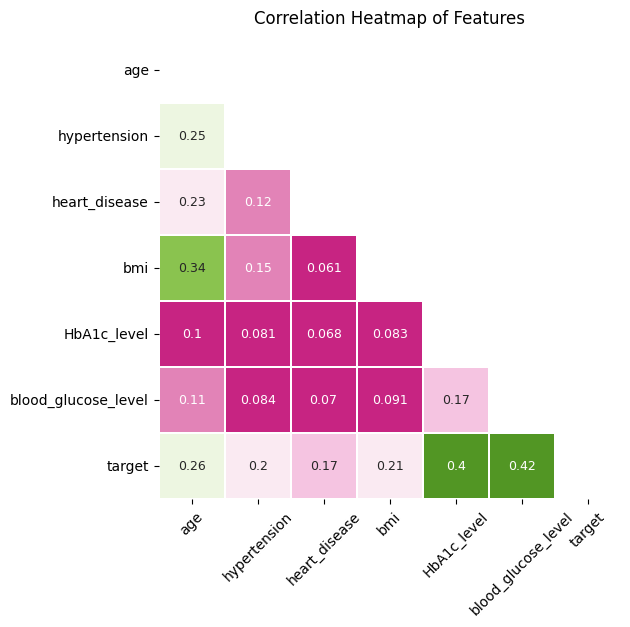

In [19]:
plt.figure(figsize=(6, 6))

numerical_values = ['float16', 'float32', 'uint16', 'uint8']

corr_data = data.select_dtypes(include=numerical_values)

lower_triangle = np.triu(corr_data.corr())

corr_matrix = sns.heatmap(corr_data.corr(),
                          annot=True,
                          cmap=sns.color_palette("PiYG", 8),
                          mask=lower_triangle,
                          square=True,
                          linewidths=0.25,
                          cbar=False,
                          annot_kws={"size":9})

corr_matrix.set_title("Correlation Heatmap of Features",
                      pad=10)

corr_matrix.set_xticklabels(corr_matrix.get_xticklabels(),
                            rotation=45)
plt.show()

### Exploratory Data Analysis & Preprocessing

#### Descriptive Statistics

In [20]:
data.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99], include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,target
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.07485,0.039420,NaN,27.320768,5.527507,138.058060,0.085000
std,NaN,0.000000,0.26315,0.194593,NaN,6.636784,1.070672,40.708136,0.278883
min,NaN,0.080017,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
1%,NaN,1.080078,0.00000,0.000000,NaN,14.600000,3.500000,80.000000,0.000000
10%,NaN,10.000000,0.00000,0.000000,NaN,19.180000,4.000000,85.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.629999,4.800000,100.000000,0.000000


### Prepare Shared Pipeline Data & Stages/Steps

#### Split Dataset into Training & Testing Datasets

In [21]:
y = data['target']
X = data.drop(columns=['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"Training Input Dataset Shape: {X_train.shape}")
print(f"Training Output Dataset Shape: {y_train.shape}")

print(f"Evaluation Input Dataset Shape: {X_test.shape}")
print(f"Evaluation Output Dataset Shape: {y_test.shape}")

Training Input Dataset Shape: (75000, 8)
Training Output Dataset Shape: (75000,)
Evaluation Input Dataset Shape: (25000, 8)
Evaluation Output Dataset Shape: (25000,)


#### Metrics Evaluation Method

In [22]:
target_id2label = ["Likely Not Diabetic",
                   "Likely Diabetic"]

def metrics_evaluation(classifier_type,
                       y_test,
                       y_pred_cv):


    print("+-------------------------------------------------------------------------+")
    print("|  " + ("Confusion Matrix for " + classifier_type).center(69) + "  |")
    print("+-------------------------------------------------------------------------+")

    cm = confusion_matrix(y_test,
                          y_pred_cv)

    display_cm = ConfusionMatrixDisplay(cm,
                                        display_labels=target_id2label
                                        )

    display_cm.plot()
    plt.show()

    print("+-----------------------------------------------------+")
    print("|  " + ("Classification Report for " + classifier_type).center(49) + "  |")
    print("+-----------------------------------------------------+")

    print(classification_report(y_test,
                                y_pred_cv,
                                zero_division=0,
                                target_names=target_id2label
                                )
          )

### Auto-Sklearn Classifier

#### Define Pipeline/Model

In [23]:
auto_sklearn_clf = AutoSklearnClassifier()

#### Fit Auto-Sklearn Classifier to Dataset

In [24]:
auto_sklearn_model = auto_sklearn_clf.fit(X_train, y_train)

#### Generate Predictions

In [25]:
predictions = auto_sklearn_model.predict(X_test)

#### Metrics Evaluation

+-------------------------------------------------------------------------+
|                    Confusion Matrix for Auto-Sklearn                    |
+-------------------------------------------------------------------------+


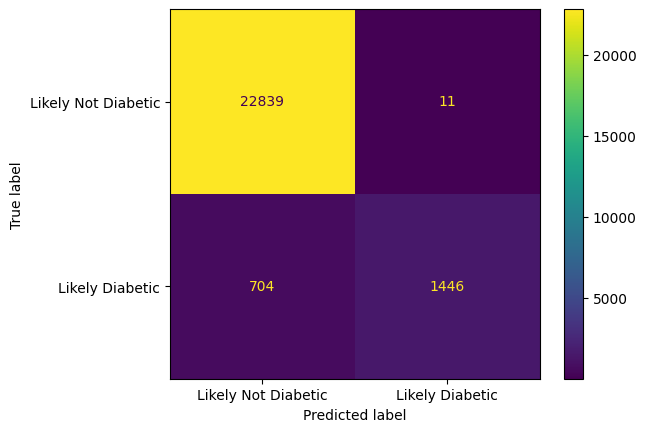

+-----------------------------------------------------+
|        Classification Report for Auto-Sklearn       |
+-----------------------------------------------------+
                     precision    recall  f1-score   support

Likely Not Diabetic       0.97      1.00      0.98     22850
    Likely Diabetic       0.99      0.67      0.80      2150

           accuracy                           0.97     25000
          macro avg       0.98      0.84      0.89     25000
       weighted avg       0.97      0.97      0.97     25000



In [26]:
metrics_evaluation("Auto-Sklearn",
                       y_test,
                       predictions)

### Notes & Other Takeaways From This Project
****
- If there was a slight imbalance in the precision-recall ratio, I would prefer the opposite of what resulted in this model. I would rather that the analytics alert or tag the profile of patients who actually do not have diabetes than have cases of actual diabetes go undetection.
****

### Citations

- Auto-Sklearn
    > @inproceedings{feurer-neurips15a, title = {Efficient and Robust Automated Machine Learning}, author = {Feurer, Matthias and Klein, Aaron and Eggensperger, Katharina and Springenberg, Jost and Blum, Manuel and Hutter, Frank}, booktitle = {Advances in Neural Information Processing Systems 28 (2015)}, pages = {2962--2970}, year = {2015}}

    > @article{feurer-arxiv20a, title = {Auto-Sklearn 2.0: Hands-free AutoML via Meta-Learning}, author = {Feurer, Matthias and Eggensperger, Katharina and Falkner, Stefan and Lindauer, Marius and Hutter, Frank}, journal = {arXiv:2007.04074 [cs.LG]}, year = {2020},}